In [1]:
## Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#### Read the Advertising_DataSet_ISL csv file from the location

In [3]:
df=pd.read_csv("Advertising_DataSet_ISL.csv")

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape

(200, 4)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
### Data Cleaning

In [10]:
## Check for null values
df.isnull().sum() # No Null Values 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
# check for outliers in the given data

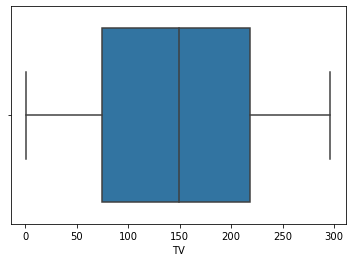

In [12]:
sns.boxplot(df['TV'])

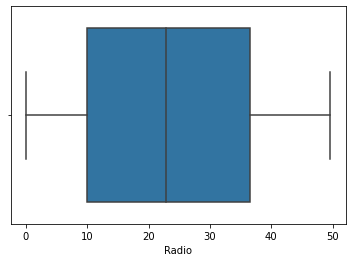

In [13]:
sns.boxplot(df['Radio'])

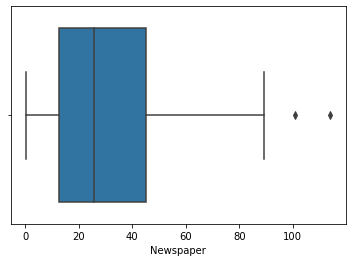

In [14]:
sns.boxplot(df['Newspaper'])

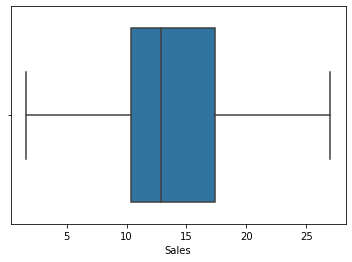

In [15]:
sns.boxplot(df['Sales'])

In [16]:
#### No considerable outliers. so no need to do outlier caping

In [17]:
### Advertising Type wise sales

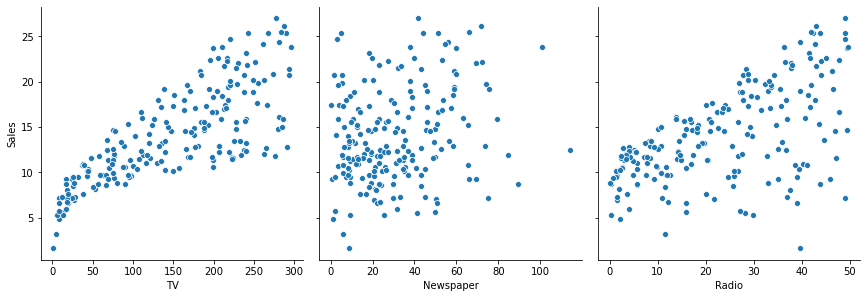

In [18]:
### Sales by Advertising Type
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

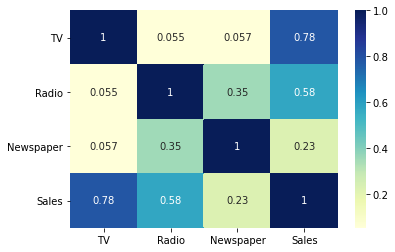

In [19]:
#### Check for correlation between the columns
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [21]:
### Model Building 

In [22]:
## x---independent variables
## y-- dependent variable (sales)

In [34]:
x=df[['TV','Newspaper','Radio']]

In [35]:
y=df['Sales']

In [36]:
#### Test-Train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
import statsmodels.api as sm

In [47]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [48]:
lr.params

const        2.652790
TV           0.045426
Newspaper    0.004603
Radio        0.189758
dtype: float64

In [49]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           9.97e-66
Time:                        15:20:49   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.000       1.893       3.412
TV             0.0454      0.002     27.093      0.000       0.042       0.049
Newspaper      0.0046      0.008      0.613      0.541      -0.010       0.019
Radio          0.1898      0.011     17.009      0.000       0.168       0.212
==============================================================================
Omnibus:                       40.095   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.622
Skew:                          -1.233   Prob(JB):                     6.94e-19
Kurtosis:                       5.873   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
### Model Evaluation

In [53]:
### Prediction on test data

In [54]:
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to x_test_sm
y_pred = lr.predict(x_test_sm)

In [62]:
res=(y_test - y_pred) ### Residual

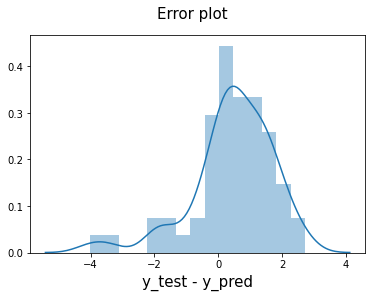

In [65]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error plot', fontsize = 15)                  
plt.xlabel('y_test - y_pred', fontsize = 15)
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.3603977338130602

In [57]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9058622107532239